# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [92]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [93]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [94]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Airport check in was functiona...
1,✅ Trip Verified | Flight fine. In-line with c...
2,✅ Trip Verified | Came from Glasgow to London...
3,✅ Trip Verified | My flight on on 12 May 2023...
4,Not Verified | Cairo is a 5 hour flight and B...


In [95]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [96]:
new_df = pd.read_csv("./data/BA_reviews.csv")
new_df

,Unnamed: 0,reviews
0,0,Not Verified | Airport check in was functiona...
1,1,✅ Trip Verified | Flight fine. In-line with c...
2,2,✅ Trip Verified | Came from Glasgow to London...
3,3,✅ Trip Verified | My flight on on 12 May 2023...
4,4,Not Verified | Cairo is a 5 hour flight and B...
...,...,...
1995,1995,"✅ Verified Review | BA club Europe, London He..."
1996,1996,✅ Verified Review | Madrid to Perth via Singa...
1997,1997,✅ Verified Review | Miami to London Heathrow ...
1998,1998,✅ Verified Review | We flew as a group of 4 fr...


In [107]:
new_df['reviews'] = new_df['reviews'].str.replace('✅ Trip Verified', '')
new_df['reviews'] = new_df['reviews'].str.replace('✅ Verified Review', '')
new_df['reviews'] = new_df['reviews'].str.replace('Not Verified', '')

In [108]:
new_df['reviews'] = new_df['reviews'].str.replace('|', '')
new_df

<ipython-input-108-2b405cba1bf7>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_df['reviews'] = new_df['reviews'].str.replace('|', '')


,Unnamed: 0,reviews
0,0,Airport check in was functionary with littl...
1,1,Flight fine. In-line with competitors. Plea...
2,2,Came from Glasgow to London and took connec...
3,3,My flight on on 12 May 2023 got delayed an ...
4,4,Cairo is a 5 hour flight and BA considers i...
...,...,...
1995,1995,"BA club Europe, London Heathrow - Istanbul ..."
1996,1996,Madrid to Perth via Singapore. So disappoin...
1997,1997,Miami to London Heathrow with British Airwa...
1998,1998,We flew as a group of 4 from Heathrow to Kra...


In [109]:
raw_df=new_df.drop(['Unnamed: 0'], axis=1).copy()
raw_df

,reviews
0,Airport check in was functionary with littl...
1,Flight fine. In-line with competitors. Plea...
2,Came from Glasgow to London and took connec...
3,My flight on on 12 May 2023 got delayed an ...
4,Cairo is a 5 hour flight and BA considers i...
...,...
1995,"BA club Europe, London Heathrow - Istanbul ..."
1996,Madrid to Perth via Singapore. So disappoin...
1997,Miami to London Heathrow with British Airwa...
1998,We flew as a group of 4 from Heathrow to Kra...


In [110]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
raw_df['Cleaned reviews'] = raw_df['reviews'].apply(clean)
raw_df

,reviews,Cleaned reviews
0,Airport check in was functionary with littl...,Airport check in was functionary with little ...
1,Flight fine. In-line with competitors. Plea...,Flight fine In line with competitors Pleasant...
2,Came from Glasgow to London and took connec...,Came from Glasgow to London and took connecti...
3,My flight on on 12 May 2023 got delayed an ...,My flight on on May got delayed an hour and m...
4,Cairo is a 5 hour flight and BA considers i...,Cairo is a hour flight and BA considers it to...
...,...,...
1995,"BA club Europe, London Heathrow - Istanbul ...",BA club Europe London Heathrow Istanbul Londo...
1996,Madrid to Perth via Singapore. So disappoin...,Madrid to Perth via Singapore So disappointed...
1997,Miami to London Heathrow with British Airwa...,Miami to London Heathrow with British Airways...
1998,We flew as a group of 4 from Heathrow to Kra...,We flew as a group of from Heathrow to Krakow...


In [111]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [112]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

raw_df['POS tagged'] = raw_df['Cleaned reviews'].apply(token_stop_pos)
raw_df

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned reviews,POS tagged
0,Airport check in was functionary with littl...,Airport check in was functionary with little ...,"[(Airport, n), (check, n), (functionary, a), (..."
1,Flight fine. In-line with competitors. Plea...,Flight fine In line with competitors Pleasant...,"[(Flight, n), (fine, n), (line, n), (competito..."
2,Came from Glasgow to London and took connec...,Came from Glasgow to London and took connecti...,"[(Came, n), (Glasgow, n), (London, n), (took, ..."
3,My flight on on 12 May 2023 got delayed an ...,My flight on on May got delayed an hour and m...,"[(flight, n), (May, n), (got, v), (delayed, v)..."
4,Cairo is a 5 hour flight and BA considers i...,Cairo is a hour flight and BA considers it to...,"[(Cairo, n), (hour, n), (flight, n), (BA, n), ..."
...,...,...,...
1995,"BA club Europe, London Heathrow - Istanbul ...",BA club Europe London Heathrow Istanbul Londo...,"[(BA, n), (club, v), (Europe, n), (London, n),..."
1996,Madrid to Perth via Singapore. So disappoin...,Madrid to Perth via Singapore So disappointed...,"[(Madrid, n), (Perth, n), (via, None), (Singap..."
1997,Miami to London Heathrow with British Airwa...,Miami to London Heathrow with British Airways...,"[(Miami, n), (London, n), (Heathrow, n), (Brit..."
1998,We flew as a group of 4 from Heathrow to Kra...,We flew as a group of from Heathrow to Krakow...,"[(flew, v), (group, n), (Heathrow, n), (Krakow..."


In [113]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

raw_df['Lemma'] = raw_df['POS tagged'].apply(lemmatize)
raw_df.head()

,reviews,Cleaned reviews,POS tagged,Lemma
0,Airport check in was functionary with littl...,Airport check in was functionary with little ...,"[(Airport, n), (check, n), (functionary, a), (...",Airport check functionary little warmth effi...
1,Flight fine. In-line with competitors. Plea...,Flight fine In line with competitors Pleasant...,"[(Flight, n), (fine, n), (line, n), (competito...",Flight fine line competitor Pleasant crew ni...
2,Came from Glasgow to London and took connec...,Came from Glasgow to London and took connecti...,"[(Came, n), (Glasgow, n), (London, n), (took, ...",Came Glasgow London take connect flight Amer...
3,My flight on on 12 May 2023 got delayed an ...,My flight on on May got delayed an hour and m...,"[(flight, n), (May, n), (got, v), (delayed, v)...",flight May get delay hour minute result canc...
4,Cairo is a 5 hour flight and BA considers i...,Cairo is a hour flight and BA considers it to...,"[(Cairo, n), (hour, n), (flight, n), (BA, n), ...",Cairo hour flight BA consider short haul eve...


In [114]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

raw_df['Sentiment'] = raw_df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
raw_df['Analysis'] = raw_df['Sentiment'].apply(vader_analysis)
raw_df.head()

,reviews,Cleaned reviews,POS tagged,Lemma,Sentiment,Analysis
0,Airport check in was functionary with littl...,Airport check in was functionary with little ...,"[(Airport, n), (check, n), (functionary, a), (...",Airport check functionary little warmth effi...,0.8862,Positive
1,Flight fine. In-line with competitors. Plea...,Flight fine In line with competitors Pleasant...,"[(Flight, n), (fine, n), (line, n), (competito...",Flight fine line competitor Pleasant crew ni...,0.7650,Positive
2,Came from Glasgow to London and took connec...,Came from Glasgow to London and took connecti...,"[(Came, n), (Glasgow, n), (London, n), (took, ...",Came Glasgow London take connect flight Amer...,-0.3400,Negative
3,My flight on on 12 May 2023 got delayed an ...,My flight on on May got delayed an hour and m...,"[(flight, n), (May, n), (got, v), (delayed, v)...",flight May get delay hour minute result canc...,-0.9356,Negative
4,Cairo is a 5 hour flight and BA considers i...,Cairo is a hour flight and BA considers it to...,"[(Cairo, n), (hour, n), (flight, n), (BA, n), ...",Cairo hour flight BA consider short haul eve...,-0.8283,Negative


In [115]:
vader_counts = raw_df['Analysis'].value_counts()
vader_counts

Positive    1045
Negative     729
Neutral      226
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7fac034e9930>,
 [Text(-0.07768961055706501, 1.0972530812950545, 'Positive'),
  Text(-0.3085492939433929, -1.0558396342281502, 'Negative'),
  Text(1.2658226671157073, -0.46924724337610946, 'Neutral')],
 [Text(-0.04237615121294455, 0.5985016807063933, '52.2%'),
  Text(-0.16829961487821432, -0.5759125277608091, '36.4%'),
  Text(0.7969994570728526, -0.29545196805162444, '11.3%')])

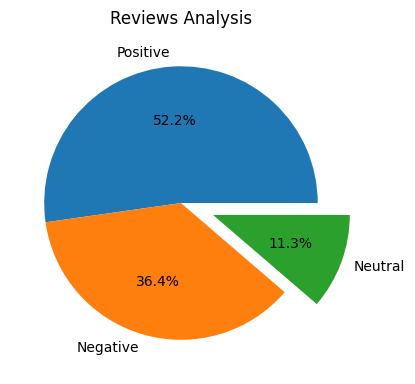

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

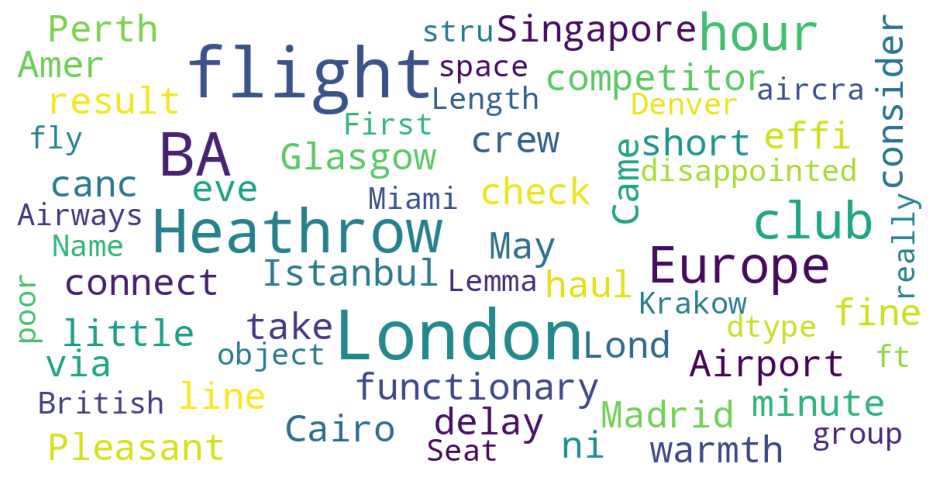

In [118]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(raw_df.Lemma)